# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

#### No-show appointments

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
- `ScheduledDay` tells us on what day the patient set up their appointment.
- `Neighborhood` indicates the location of the hospital.
- `Scholarship` indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

##### Data Dictionary
- 01 - PatientId
    Identification of a patient
- 02 - AppointmentID
    Identification of each appointment
- 03 - Gender
    Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
- 04 - DataMarcacaoConsulta
    The day of the actuall appointment, when they have to visit the doctor.
- 05 - DataAgendamento
    The day someone called or registered the appointment, this is before appointment of course.
- 06 - Age
    How old is the patient.
- 07 - Neighbourhood
    Where the appointment takes place.
- 08 - Scholarship
    True of False 
- 09 - Hipertension
    True or False
- 10 - Diabetes
    True or False
- Alcoholism
    True or False
- Handcap
    True or False
- SMS_received
    1 or more messages sent to the patient.
- No-show
    True or False.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load data 
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

### Inspect Basic Structure

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Problem 1: PatientId is in scientific notation
Large ints are truncated when stored as float and this may lead losing precision and merging patients incorrectly. That's why PatientId should be converted into a `string`.

#### Problem 2: ScheduledDay and AppointmentDay are strings not datetime
They need to be coverted to `datetime` to compute important features like:
- waiting time
- day of week
- same - day scheduling

#### Problem 3: Age should be checked for impossible values
- Age (min) = -1
- Age (max) = 115

#### Problem 4: No - show column encoded inversely
- `No` : Patient showed up
- `Yes` : Patient did not show up

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### PatientId
PatientId appears corrupted:
- min : 3.921784e+04	
- max : 9.999816e+14

To prevent further corruption PatientId must be converted to string. 

#### Handcap Column 
Handcap max = 4

- Value `0` means no disability
- Value `1-4` means different disability levels


### Data Cleaning

In [6]:
# Fix PatientId (Float --> String)

df['PatientId'] = df['PatientId'].astype('int64').astype('string')

In [7]:
# Convert Date Columns to Datetime 

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [8]:
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

In [9]:
# Handle Invalid Age Values

df = df[(df['Age'] >= 0) & (df['Age'] < 100)] 

In [10]:
# Create waiting_days feature

df['waiting_days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

df = df[df['waiting_days'] >= 0]

df.groupby('waiting_days')['No-show'].mean()

waiting_days
0      0.213587
1      0.238251
2      0.234735
3      0.232703
4      0.266097
         ...   
154    0.600000
161    0.181818
168    0.125000
175    0.375000
178    0.200000
Name: No-show, Length: 128, dtype: float64

The longer the delay between the scheduling and the appointment, the more likely life will interfere. So, `waiting_days` predictor becomes the strongest predictor of no-shows. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71950 entries, 5 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientId       71950 non-null  string             
 1   AppointmentID   71950 non-null  int64              
 2   Gender          71950 non-null  object             
 3   ScheduledDay    71950 non-null  datetime64[ns, UTC]
 4   AppointmentDay  71950 non-null  datetime64[ns, UTC]
 5   Age             71950 non-null  int64              
 6   Neighbourhood   71950 non-null  object             
 7   Scholarship     71950 non-null  int64              
 8   Hipertension    71950 non-null  int64              
 9   Diabetes        71950 non-null  int64              
 10  Alcoholism      71950 non-null  int64              
 11  Handcap         71950 non-null  int64              
 12  SMS_received    71950 non-null  int64              
 13  No-show         71950 non-null  int

In [12]:
df.describe()

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_days
count,7.195000e+04,71950.000000,71950.000000,71950.000000,71950.000000,71950.000000,71950.000000,71950.000000,71950.000000,71950.000000
mean,5.655036e+06,38.494010,0.092717,0.208909,0.074732,0.025323,0.019958,0.493120,0.285184,14.642530
std,7.472214e+04,22.913947,0.290038,0.406532,0.262961,0.157106,0.153864,0.499956,0.451505,16.494693
min,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.617794e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,5.661160e+06,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,5.707173e+06,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,21.000000
max,5.784985e+06,98.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178.000000


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: How does the waiting time between scheduling and appointment day affect the likelihood of a patient not showing up?

In [13]:
def no_show_rate_by_group(df, group_col, target_col = 'No-show'):
    """
    Calculate and plot the mean no-show rate for each category in `group_col`.
    
    Parameters:
    -----------
    df: pandas.DataFrame
        The cleaned appointment dataset.
    group_col : str
        Column name to group by (e.g., 'waiting_days', 'Age', 'SMS_received').
    target_col : str, optional
        Column name indicating no-show status, by default 'No-show'.
        
    
    Returns:
    ----------
    pandas.Series
        A Series with the mean no-show rate for each category of `group_col`. 
    """
    # compute mean no-show rate by group
    rates = df.groupby(group_col)[target_col].mean()
    
    unique_values = df[group_col].nunique()
    
    plt.figure(figsize = (10,4))
    
    if unique_values <= 10:
        rates.sort_values(ascending = False).plot(kind = 'bar')
        plt.title(f'No-show Rate by {group_col} (Categorical)')
        plt.xlabel(group_col)
        plt.ylabel('No-show Rate')
        
    else:   
        plt.plot(rates.index, rates.values, marker = 'o')
        plt.title(f'No-show Rate by {group_col} (Numerical)')
        plt.ylabel('No-show Rate')
        
    plt.tight_layout()
    plt.show()

    return rates

In [14]:
def plot_hist(df, group_col, bins, figsize = (8,5)):
    
    """
    Plots a histogram for any numerical column in the dataframe.
    
    Parameters: 
    -----------
    df : pandas.DataFrame
        The dataset containing the column to plot.
    col : str
        Column name of the numerical variable to plot.
    bins : int, optional
        Number of histogram bins.
    figsize : tuple, optional
        Figure size for the plot (default is (8,5)).
        
    Returns:
    ---------
    None
        Displays the histogram plot.
    
    """
    
    plt.figure(figsize = figsize)
    plt.hist(df[group_col], bins = bins, edgecolor = 'black')
    plt.title(f"Distribution of {group_col}")
    plt.xlabel(group_col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    

In [15]:
df['waiting_days'].describe()

count    71950.000000
mean        14.642530
std         16.494693
min          0.000000
25%          3.000000
50%          8.000000
75%         21.000000
max        178.000000
Name: waiting_days, dtype: float64

In [16]:
df['No-show'].value_counts(normalize=True)

No-show
0    0.714816
1    0.285184
Name: proportion, dtype: float64

Most of the appointments are scheduled fairly soon, `median = 8 days`, `75% happen in 21 days`. Long waits like 178 days are rare but exist. In addition to these observations about 28.5% of appointments are missed. The dataset is imbalanced, but not severely.

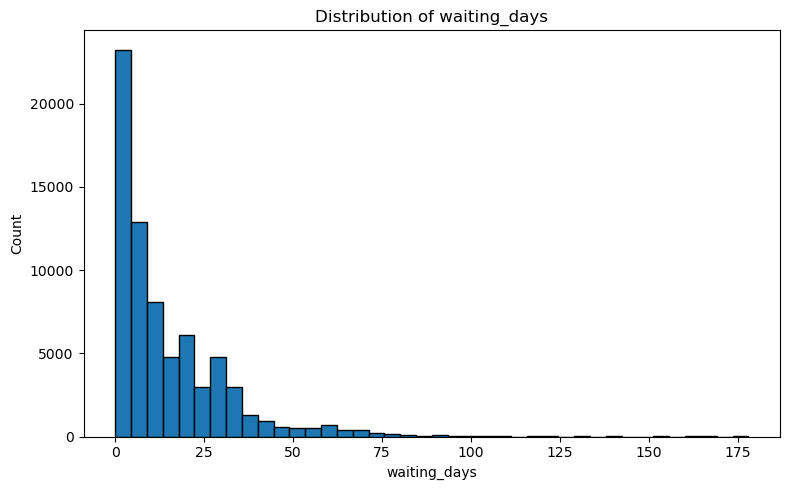

In [17]:
plot_hist(df, 'waiting_days', bins=40)

#plt.figure(figsize = (8,5))
#df['waiting_days'].hist(bins = 40)
#plt.xlabel('Waiting Days')
#plt.ylabel('Frequency')
#plt.title('Waiting Days Distribution')
#plt.show()

When we interpret the `Waiting Days Distribution`plot:
1. The distribution is heavily right-skewed
Most appointments are scheduled with short waiting periods, and the frequency drops dramatically as waiting days increase. 
2. The most common waiting intervals appear between 0-10 days
A very tall concentration can be seen on the left side of the plot (days 0-10)
    - Day 0    --> same day appointment
    - Day 1-3  --> very short waiting 
    - Day 4-10 --> short to moderate
    
This indicates that the clinic schedules most appointments very soon after scheduling. 

3. Long waiting times (50-100+ days) are rare
These extreme delays are rare but they often produce very high no-show rates. 

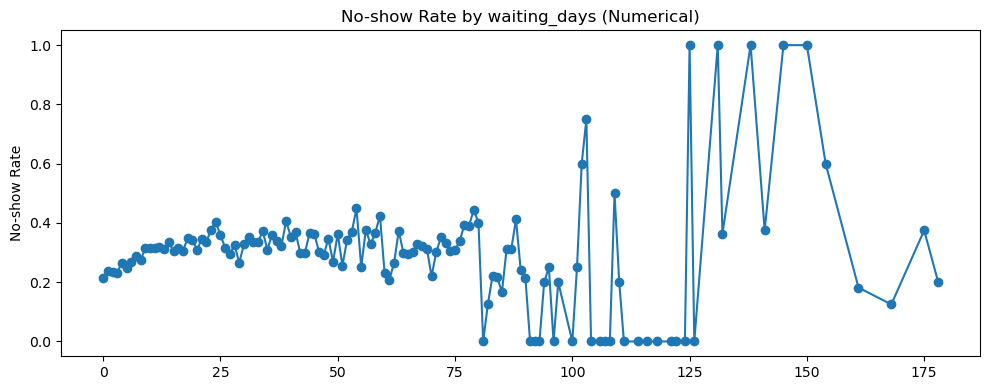

In [18]:
#waiting_no_show = df.groupby('waiting_days')['No-show'].mean()

waiting_no_show = no_show_rate_by_group(df, 'waiting_days')
#plt.figure(figsize = (10,5))
#plt.plot(waiting_no_show.index, waiting_no_show.values)
#plt.xlabel('Waiting Days')
#plt.ylabel('No-show Rate')
#plt.title('No-show Rate vs Waiting Days')
#plt.show()

When we look at the left side of the plot `0 to 60 days`:

 - waiting_days =  0 - 5   --> No-show is approximately 20 - 25% 
 - waiting_days = 10 - 20  --> No-show is approximately 30 - 35% 
 - waiting_days = 20 - 40  --> No-show is approximately 33 - 38% 
 - waiting_days = 50 - 60  --> No-show is approximately 35 - 45% 

There is a visible increasing trend, the curve rises gradually until around 40 - 60 days. Longer wait means higher chance of missing the appointment. Extreme waiting times show wild spikes because there are very few appointments in those bins. This causes noise, not actual trends. 

### Research Question 2 : How does age influence the likelihood of a patient not showing up to their appointment?

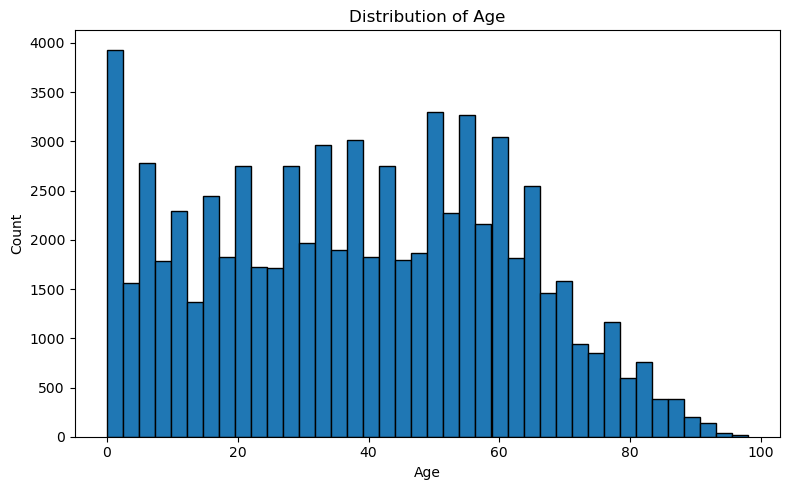

In [19]:
# What does the patient population look like?
plot_hist(df, 'Age', bins = 40)

#plt.figure(figsize = (8,5))
#df['Age'].hist(bins = 40)
#plt.xlabel('Age')
#plt.ylabel('Frequency')
#plt.title('Age Distribution of Patients')
#plt.show()

The patient population covers a wide age range, the ages distribute from 0(infants) to 98 (very elderly). There is a high number of very young patients, this means that many appointments involve babies and toddlers and attendance of these young patients depends completely on parents / caregivers. This has an impact on no-show behavior. 

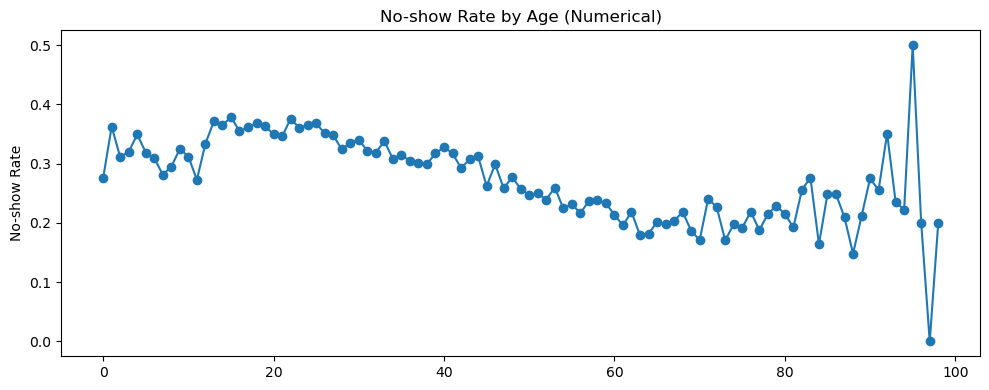

In [20]:
age_no_show = no_show_rate_by_group(df, 'Age')

#age_no_show = df.groupby('Age')['No-show'].mean()

#plt.figure(figsize = (10,5))
#plt.plot(age_no_show.index, age_no_show.values)
#plt.xlabel('Age')
#plt.ylabel('No-show Rate')
#plt.title('No-show Rate by Age')
#plt.show()

Children and young adults (0-20 years) have the highest no-show rates because adolescents and young adults tend to have less consistent health-seeking behavior. Teens or children rely on parents to bring them (transportation or parental schedule issues).Young adults often reprioritize or forget appointments. However, no- show rates gradually decrease with age. This means that middle-aged adults often have more structured routines or they may have chronic conditions and need regular follow-up. 

C:\Users\Asus\AppData\Local\Temp\ipykernel_31404\1424089277.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_show_by_group = df.groupby('age_group')['No-show'].mean()


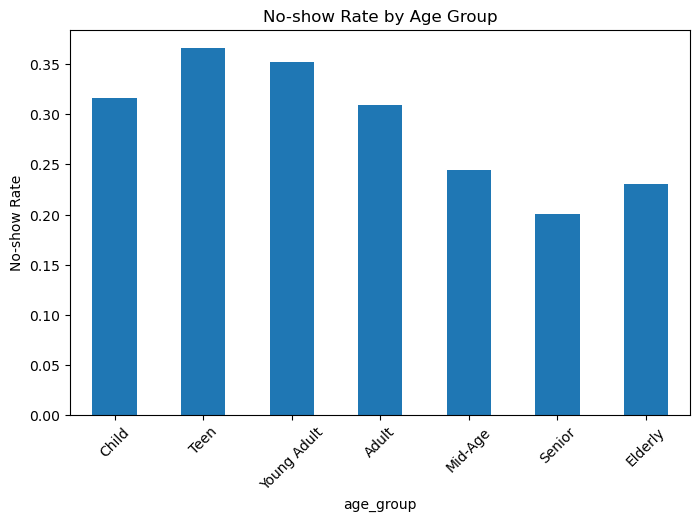

In [21]:
bins = [0, 12, 18, 30, 45, 60, 80, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Mid-Age', 'Senior', 'Elderly']

df['age_group'] = pd.cut(df['Age'], bins = bins, labels = labels)
no_show_by_group = df.groupby('age_group')['No-show'].mean()

plt.figure(figsize = (8,5))
no_show_by_group.plot(kind = 'bar')
plt.ylabel('No-show Rate')
plt.title('No-show Rate by Age Group')
plt.xticks(rotation=45)
plt.show()

### Research Question 3 : Does receiving an SMS reminder reduce the no-show rate?

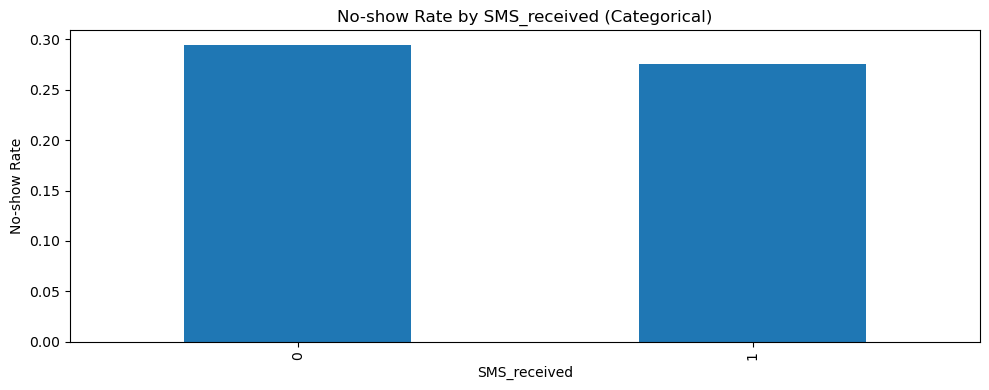

SMS_received
0    0.294352
1    0.275761
Name: No-show, dtype: float64

In [22]:
no_show_by_sms = no_show_rate_by_group(df, 'SMS_received')
no_show_by_sms.head()

The no-show rate is slightly higher among patients who did not receive an SMS reminder (≈29.4%) compared to those who did (≈27.6%). This suggests that SMS reminders may be associated with a small reduction in missed appointments. However, the difference is relatively small, and since the data are observational, this relationship should be interpreted as a correlation rather than a causal effect.

<a id='conclusions'></a>
## Conclusions
In this project, I explored factors associated with whether a patient attended or missed their medical appointment in the No-Show Appointments dataset. After cleaning the data and removing invalid age values and negative waiting times, I conducted exploratory analyses focusing on three main research questions. However, this analysis has some important limitations. First, the dataset is observational and limited to medical appointments from a single public healthcare system in Brazil, so the findings may not generalize to other cities, countries, or healthcare contexts. Second, many potentially important factors are not available in the data, such as the reason for the visit, distance to the clinic, transportation options, or the exact appointment time of day. These unobserved variables could influence both waiting time, age, and the likelihood of missing an appointment. Therefore, the relationships identified in this analysis should be interpreted as correlations rather than causal effects.

There is a clear association between waiting_days (the time between scheduling and appointment date) and the likelihood of missing the appointment. Patients with very short waiting periods (0–3 days) had the lowest no-show rates. As waiting time increased, the no-show rate gradually rose, especially for delays between 20 and 60 days. Extremely long waiting periods (60+ days) also showed high no-show rates, although these points were more variable due to limited data. This suggests that longer delays may contribute to decreased appointment adherence, possibly due to forgetfulness, changing priorities, or reduced perceived urgency. However, this is an observational correlation, not causal evidence.

Age shows a meaningful pattern in attendance behavior. Younger patients particularly those in the 0–20 age range had the highest no-show rates, often between 30–38%. No-show probability then declined steadily through adulthood, reaching its lowest levels (~15–20%) among patients aged 50–70. A slight increase appeared again among the oldest patients, which may reflect mobility or health barriers. This pattern aligns with expected medical-attendance behaviors across life stages. Nevertheless, the dataset does not provide enough detail to conclude why these differences occur.

The SMS reminder variable also showed a small but noticeable difference. Patients who received an SMS reminder had slightly lower no-show rates (≈27.6%) compared to those who did not receive one (≈29.4%). While the effect is modest, it suggests that reminder systems may play a helpful role in improving attendance. However, this relationship is correlational and cannot be interpreted as evidence that SMS reminders directly reduce no-shows.

Overall, this exploratory analysis highlights meaningful patterns in appointment attendance and identifies several factors worth further investigation. Future research with more detailed and controlled data could help clarify the causal mechanisms behind these trends and support the design of more effective patient-engagement strategies.

In [23]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 572606 bytes to Investigate_a_Dataset.html
